In [1]:
%pylab inline
from numba import njit, vectorize, prange

Populating the interactive namespace from numpy and matplotlib


In [2]:
@njit(nogil=True)
def friction(v,vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

@njit(nogil=True)
def simulation_spring(x0,T=10,dt=0.0001,vt=1.0):
    times = np.arange(0,T,dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for i in range(1,len(times)):
        
        t = times[i]
        a = friction(v,vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[i] = x/x0
        
    return times,positions
        

In [18]:
%time _=simulation_spring(1)

CPU times: user 1.06 ms, sys: 521 µs, total: 1.58 ms
Wall time: 1.12 ms


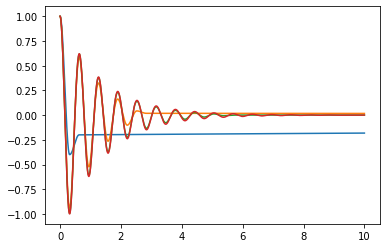

In [5]:
plot(*simulation_spring(0.1))
plot(*simulation_spring(1))
plot(*simulation_spring(10))
plot(*simulation_spring(1000))

In [19]:
%%time

from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(4) as ex:
    ex.map(simulation_spring,np.arange(0.1,1000,0.1))

CPU times: user 8.76 s, sys: 147 ms, total: 8.91 s
Wall time: 3.08 s


In [20]:
@njit(parallel=True)
def run_sim(end=1000):
    for i in prange(int(end/0.1)):
        if i==0:
            continue
        simulation_spring(i*0.1)
run_sim(10)

In [22]:
%time run_sim(1000)

CPU times: user 8.05 s, sys: 71.3 ms, total: 8.12 s
Wall time: 2.74 s
